In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['GOOG', 'AMZN', 'TSLA']
start_date = '2013-05-01'
end_date = '2023-05-01'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
returns = data.pct_change().dropna()

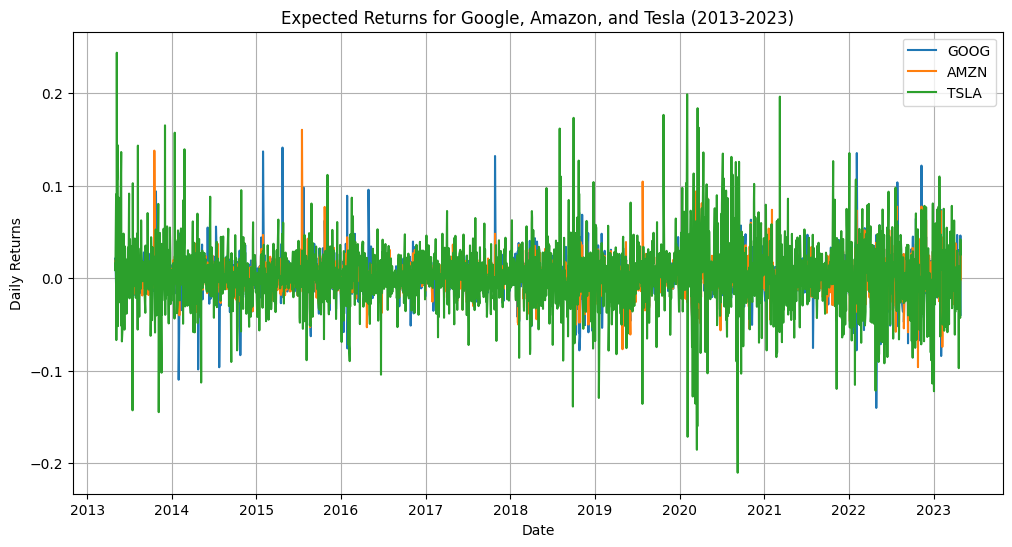

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(returns)
plt.title('Expected Returns for Google, Amazon, and Tesla (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend(tickers)
plt.grid(True)
plt.show()

In [ ]:
annual_mean_return = returns.mean() * 252
correlation_matrix = returns.corr()
daily_std_dev = returns.std()
annual_std_dev = daily_std_dev * np.sqrt(252)
risk_free_rate = 0.02
sharpe_ratio = (annual_mean_return - risk_free_rate) / annual_std_dev
print("Annualized Daily Mean Return:")
print(annual_mean_return)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nSharpe Ratio:")
print(sharpe_ratio)
print("\nAnnualized Daily Standard Deviation:")
print(annual_std_dev)

Annualized Daily Mean Return:
Ticker
AMZN    0.268254
GOOG    0.205076
TSLA    0.549848
dtype: float64

Correlation Matrix:
Ticker      AMZN      GOOG      TSLA
Ticker                              
AMZN    1.000000  0.642312  0.378037
GOOG    0.642312  1.000000  0.357672
TSLA    0.378037  0.357672  1.000000

Sharpe Ratio:
Ticker
AMZN    0.755127
GOOG    0.668971
TSLA    0.917979
dtype: float64

Annualized Daily Standard Deviation:
Ticker
AMZN    0.328759
GOOG    0.276657
TSLA    0.577189
dtype: float64


In [ ]:
np.random.seed(42)
num_portfolios = 10000
portfolio_weights = []
portfolio_returns = []
portfolio_volatilities = []

for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_weights.append(weights)
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)

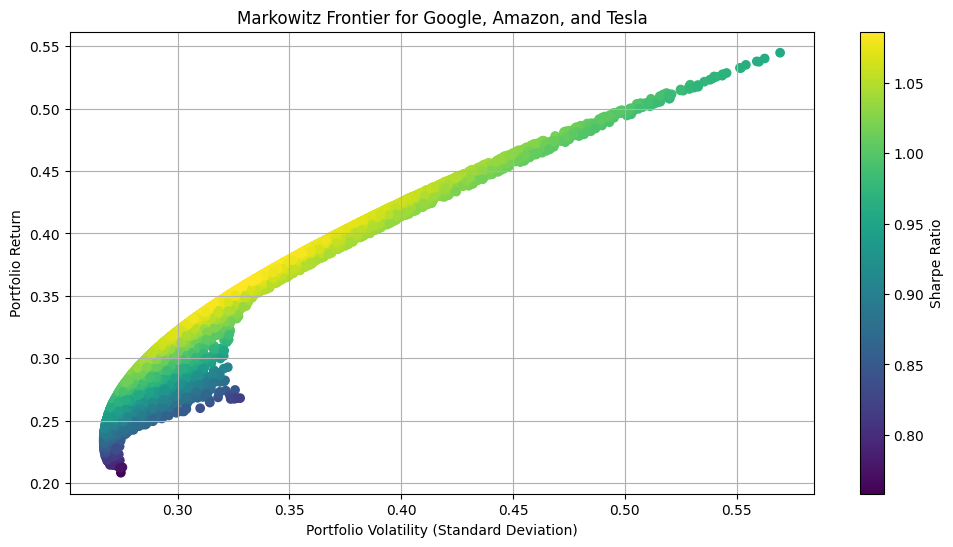

In [ ]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
plt.figure(figsize=(12, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns / portfolio_volatilities, marker='o')
plt.title('Markowitz Frontier for Google, Amazon, and Tesla')
plt.xlabel('Portfolio Volatility (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [ ]:
max_return = np.max(portfolio_returns)
max_return_index = np.argmax(portfolio_returns)
max_return_risk = portfolio_volatilities[max_return_index]

In [ ]:
min_std = np.min(portfolio_volatilities)
min_std_index = np.argmin(portfolio_volatilities)
min_std_return = portfolio_returns[min_std_index]

In [ ]:
return_range = np.linspace(min_std_return + 0.01, max_return - 0.01, 10)
range_risk = []
for target_return in return_range:
    diff = np.abs(portfolio_returns - target_return)
    closest_index = np.argmin(diff)
    range_risk.append(portfolio_volatilities[closest_index])
print("Maximum Return:", max_return)
print("Associated Risk (Standard Deviation):", max_return_risk)
print("Index of Weights:", max_return_index)

print("\nMinimum Standard Deviation:", min_std)
print("Associated Return:", min_std_return)
print("Index of Weights:", min_std_index)

print("\nRange of Returns:", return_range)
print("Associated Risk (Standard Deviation):", range_risk)

Maximum Return: 0.5447685536386618
Associated Risk (Standard Deviation): 0.5693980376558372
Index of Weights: 5227

Minimum Standard Deviation: 0.2670065980362141
Associated Return: 0.23393886885075002
Index of Weights: 2634

Range of Returns: [0.24393887 0.27625328 0.30856769 0.3408821  0.37319651 0.40551092
 0.43782533 0.47013973 0.50245414 0.53476855]
Associated Risk (Standard Deviation): [0.2770349140640154, 0.27550160243418287, 0.29329413520573555, 0.3147112016112185, 0.35253026691370454, 0.37833290784098184, 0.4276446688039051, 0.46152625350621057, 0.5112145632171752, 0.5541030985209358]


In [ ]:
max_return_weights = portfolio_weights[max_return_index]
print("\nWeights for Maximum Return Portfolio:", max_return_weights)


Weights for Maximum Return Portfolio: [0.01226025 0.00471861 0.98302114]
